In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os import listdir
import soundfile
from IPython.display import Audio
import random
import math
    
librosa.__version__

'0.8.0'

In [2]:
def applyFadeFilter(fadetime,signal,fs): 
    num_fad_samp = int(fadetime*fs)
    signal_length = len(signal)
    fadefilter = np.ones(signal_length)
    if num_fad_samp>0:
        fadefilter[0:num_fad_samp]=np.linspace(0,1,num_fad_samp)
        fadefilter[signal_length-num_fad_samp:signal_length]=np.linspace(1,0,num_fad_samp)

    return fadefilter*signal

In [3]:
def get_sine(a, f, fs, t):
    data = a * np.sin(2* np.pi * f * np.arange(int(fs*t))/fs)
    data = applyFadeFilter(0.05, data, fs)
    return data

160000


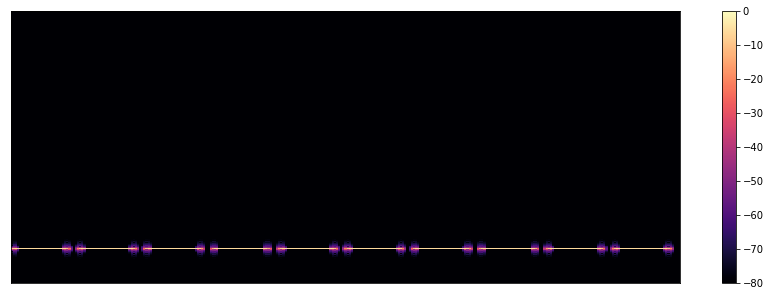

In [4]:
audio_file = 'screening/1000hztone.wav'
num_seconds = 10
full_tone = np.array([])
for i in range(num_seconds):
    vol_sine_tone = get_sine(1.0, 1000, 16000, 0.85)
    zero_sine_tone = get_sine(0.0, 1000, 16000, 0.15)
    vol_sine_tone = np.append(vol_sine_tone, zero_sine_tone)
    full_tone = np.append(full_tone, vol_sine_tone)

print(len(full_tone))
soundfile.write(audio_file, full_tone, samplerate=16000)

fig = plt.figure(figsize=(15,5))
audio,_ = librosa.load(audio_file, sr=16000)
D = librosa.stft(audio)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img = librosa.display.specshow(S_db,sr=16000)
fig.colorbar(img)
Audio(audio, rate=16000)